# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (23)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**26/02/2024**

## Aplicar un caso de uso (*Clustering*)

### Dataset de *Bike-sharing*

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 18, 8 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

Leemos los datos mediante el archivo adjunto.

In [3]:
# Lectura de datos
df_bike = pd.read_csv('bike-sharing-daily.csv')
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Vamos a quitar los datos que no son de intrés para este estudio, como el número de registros o la fecha que en sí no nos dice nada. Nos quedamos con el número total de bicicletas sin desglosarlo. 

In [4]:
col_drop = ['instant', 'dteday', 'yr', 'casual', 'registered']
df_bike2 = df_bike.drop(columns=col_drop)
df_bike2

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [5]:
df_bike3 = df_bike2.drop(columns=['weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'])
df_bike3

,season,mnth,holiday,weathersit,cnt
0,1,1,0,2,985
1,1,1,0,2,801
2,1,1,0,1,1349
3,1,1,0,1,1562
4,1,1,0,1,1600
...,...,...,...,...,...
726,1,12,0,2,2114
727,1,12,0,2,3095
728,1,12,0,2,1341
729,1,12,0,1,1796


---

### **`Ejercicio 23.1`**

Para poder realizar un ejercicio de **aprendizaje no-supervisado** tipo **clustering**, necesitamos hacernos primero una idea sobre el **número de los clusters o los grupos** que están presentes en los datos. 

**`23.1.1`** En primer lugar, **estandariza** los datos del dataset filtrado (_df_bike3_) llevando los valores de cada variable a una escala **entre 0 y 1**.

**`23.1.2`** Aplica un análisis de componentes principales usando el método **`PCA`** de la librería _sklearn_ para llevar los datos a un **espacio bidimensional**. Calcula **el porcentaje total de varianza** que incluyen los dos componentes principales juntos, posteriormente:

- Visualiza en una gráfica los datos del vector con los valores proyeccionados a los dos componentes principales.
- Visualiza la misma gráfica, ésta vez pintando los puntos de datos según la condición meteorológica del día (variable `weathersit`).  

**`23.1.3`** Utiliza la visualización obtenida de los datos en el espacio bidimensional para hacer una **estimación del número óptimo de los clusters (_k_)** o los grupos presentes en el dataset. 

### **`Ejercicio 23.2`**

**`23.2.1`** Calcula las diferentes métricas de análisis de calidad de clustering, usando el **vector con los datos proyeccionados** a los dos componentes principales, y compara si cada estimación coincide con el número óptimo de clusters inferido en el paso anterior (_23.1.3_):

 - WSS (Elbow method)
 - Silhouette score
 - Davies-Bouldin index
 - **Calinski and Harabasz score**
 - **BIC score** (implementación adhoc de las sesiones anteriores)
 - BIC score of GMM
 - `random_state=100`

### **`Ejercicio 23.3`**

**`23.3.1`** Crea diferentes modelos de clustering **usando el vector con los datos proyeccionados a los dos componentes principales** y el número estimado de los clusters en el paso (_23.1.3_), genera las gráficas de cada modelo dibujando los centroides si se corresponde y compara los resultados obtenidos según estas gráficas. Explica cuál de estos métodos logra **acercarse más a la agrupación sugerida** mediante la visualización de los datos transformados al espacio bidimensional (realizado en el paso _23.1.3_) :  

 - `random_state=100` 
 - K-Means
 - K-Medoids
 - GMM
 - DBSCAN (`eps=0.10`)
 - Agglomerative (`linkage='single', metric='euclidean'`)

**`23.3.2`** Añade los resultados del último modelo (_AgglomerativeClustering_) a los datos del DataFrame filtrado (_df_bike3_) para guardar en una nueva columna llamada `'labels'` las etiquetas generadas por el modelo de clustering jerárquico. Después, analiza la volumetría de los clusters identificados mediante la siguiente gráfica:

- **_Count plot_** de los`'labels'` que muestra el tamaño de cada cluster.

### **`Ejercicio 23.4`**

**`23.4.1`** Compara las cracterísticas del **primer cluster** con el **décimo grupo** (_cluster_0_ y _cluster_9_) y explica los aspectos que revelan cada uno de estos grupos sobre los **distintos patrones de movilidad y el uso de _bike-sharing_** en la ciudad. Te puedes basar en los siguientes criterios para describir y comparar el perfil que representa cada cluster:

- **El volúmen de los viajes diarios** o el uso registrado de _bike-sharing_ por día, mediante la siguiente gráfica:  

  - La distribución de la volumetría de viajes/bicicletas alquiladas al día (`'cnt'`) para esos dos clusters (por `'labels'` y usando _boxplot_).
- **El mes de año**, mediante la siguiente gráfica:
  - La distribución del mes de año (`'mnth'`) para esos dos clusters (por `'labels'` y usando _boxplot_).
- **Las condiciones del tiempo**, mediante la siguiente gráfica:
  - La distribución del estado del tiempo que hace en la ciudad (`'weathersit'`) para esos dos clusters (por `'labels'` y usando _boxplot_).

**`23.4.2`** Finalmente **sugiere posibles usos** que se pueda sacar de estos resultados y de este análisis!! 

---

### **`Ejercicio 23.1`**

In [6]:
## Solución 23.1.1
from sklearn.preprocessing import MinMaxScaler

escalado = MinMaxScaler().fit(df_bike3)
dataset_bike_norm = escalado.transform(df_bike3)

df_bike_norm = pd.DataFrame(dataset_bike_norm, columns=df_bike3.columns)

df_bike_norm

,season,mnth,holiday,weathersit,cnt
0,0.0,0.0,0.0,0.5,0.110792
1,0.0,0.0,0.0,0.5,0.089623
2,0.0,0.0,0.0,0.0,0.152669
3,0.0,0.0,0.0,0.0,0.177174
4,0.0,0.0,0.0,0.0,0.181546
...,...,...,...,...,...
726,0.0,1.0,0.0,0.5,0.240681
727,0.0,1.0,0.0,0.5,0.353543
728,0.0,1.0,0.0,0.5,0.151749
729,0.0,1.0,0.0,0.0,0.204096


In [7]:
## Solución 23.1.2
from sklearn.decomposition import PCA

pca_23 = PCA(n_components=2)

pca_23.fit(dataset_bike_norm)
pcv_23 = pca_23.transform(dataset_bike_norm)

In [8]:
print("Porcentaje total de varianza:", pca_23.explained_variance_ratio_.sum() * 100, '%')

Porcentaje total de varianza: 79.36129806286179 %


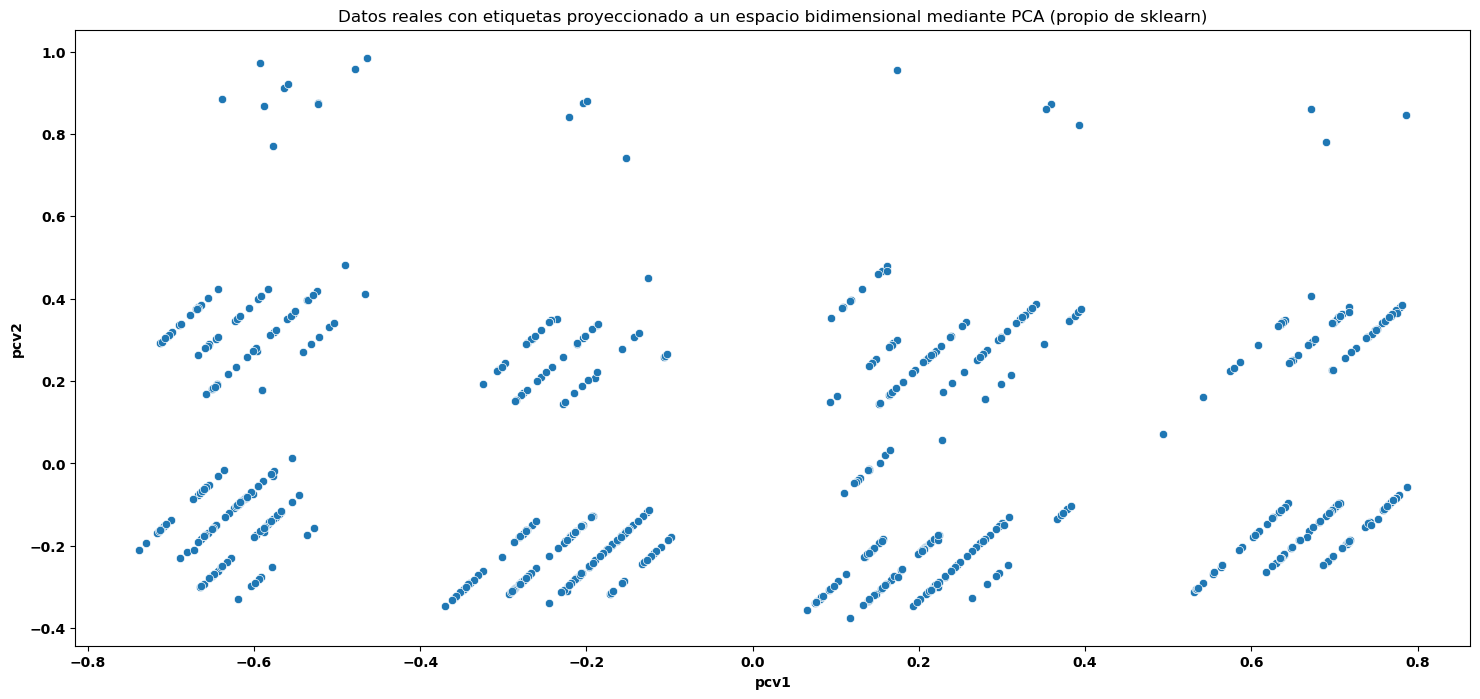

In [9]:
df_pca_23 = pd.DataFrame(data=pcv_23, columns=['pcv1', 'pcv2'])

sns.scatterplot(x=df_pca_23['pcv1'], y=df_pca_23['pcv2'])

plt.title("Datos reales con etiquetas proyeccionado a un espacio bidimensional mediante PCA (propio de sklearn)")

plt.show()

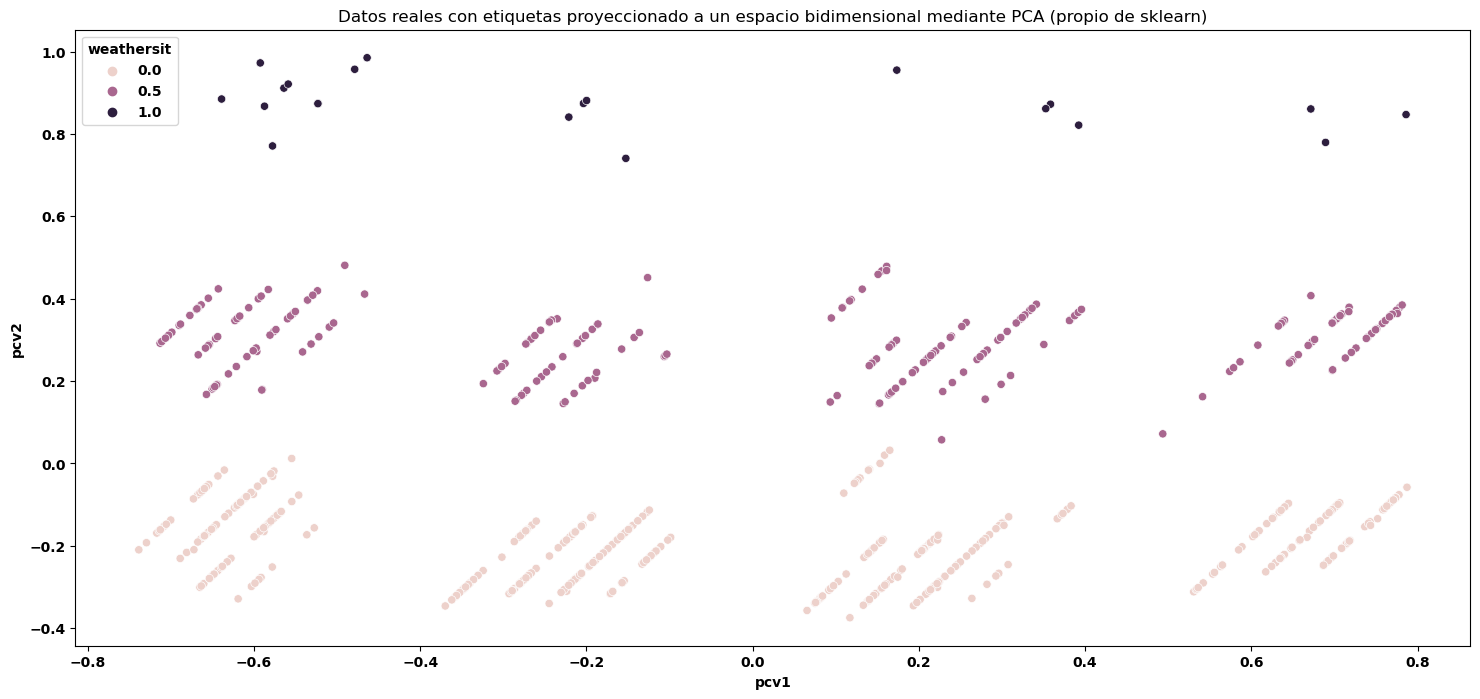

In [10]:
sns.scatterplot(x=df_pca_23['pcv1'], y=df_pca_23['pcv2'], hue=df_bike_norm['weathersit'])

plt.title("Datos reales con etiquetas proyeccionado a un espacio bidimensional mediante PCA (propio de sklearn)")

plt.show()

> #### Explicación 23.1.3
> Tras visualizar la gráfica, podríamos estimar que en el dataset se encuentran presentes **12 grupos**, o al menos este podría ser el número optimo de clusters.

---

### **`Ejercicio 23.2`**

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

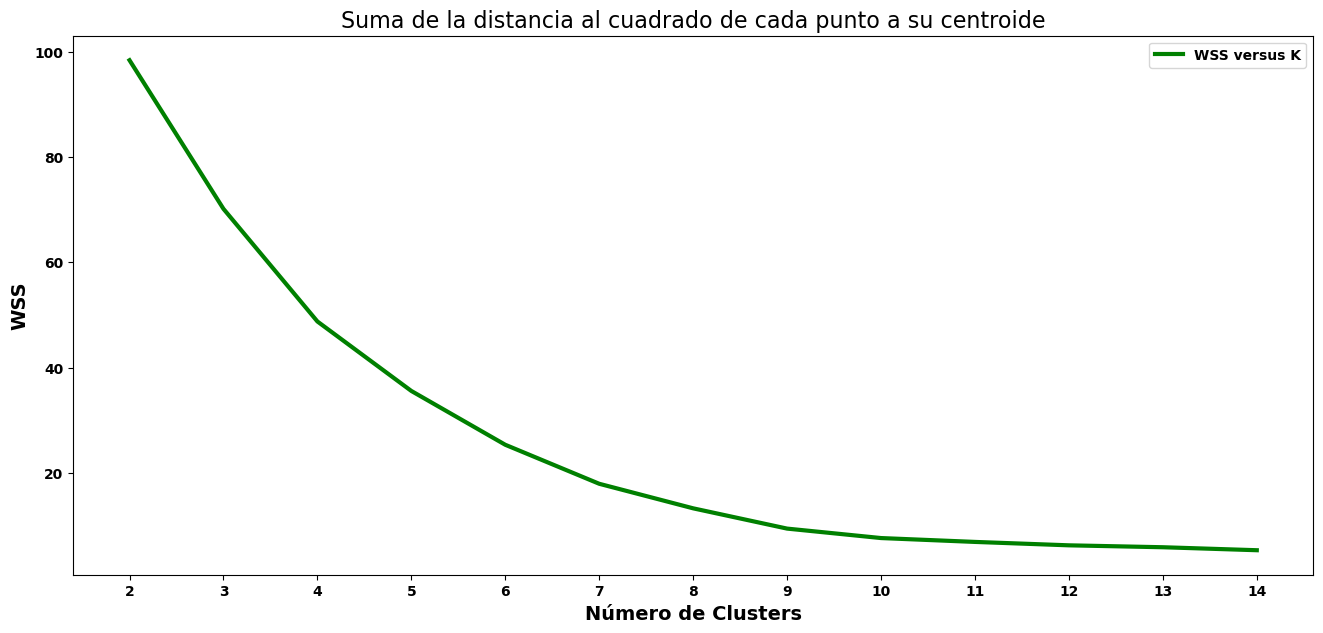

In [11]:
## Solución 23.2.1
from sklearn.cluster import KMeans

distor_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23)
    distor_clust.append(modelo_km.inertia_)

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=distor_clust, color='green', label='WSS versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("WSS", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

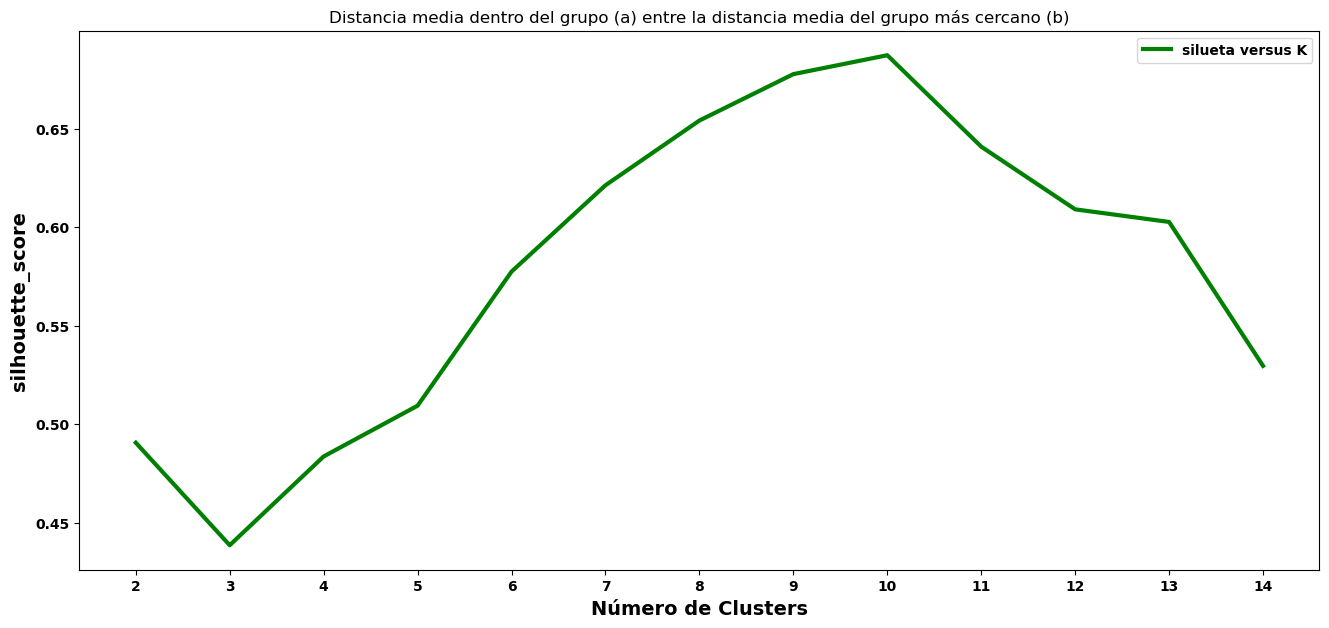

In [12]:
from sklearn.metrics import silhouette_score

sil_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23)
    y_modelo_km = modelo_km.predict(pcv_23)
    sil_clust.append(silhouette_score(pcv_23, y_modelo_km))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=sil_clust, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

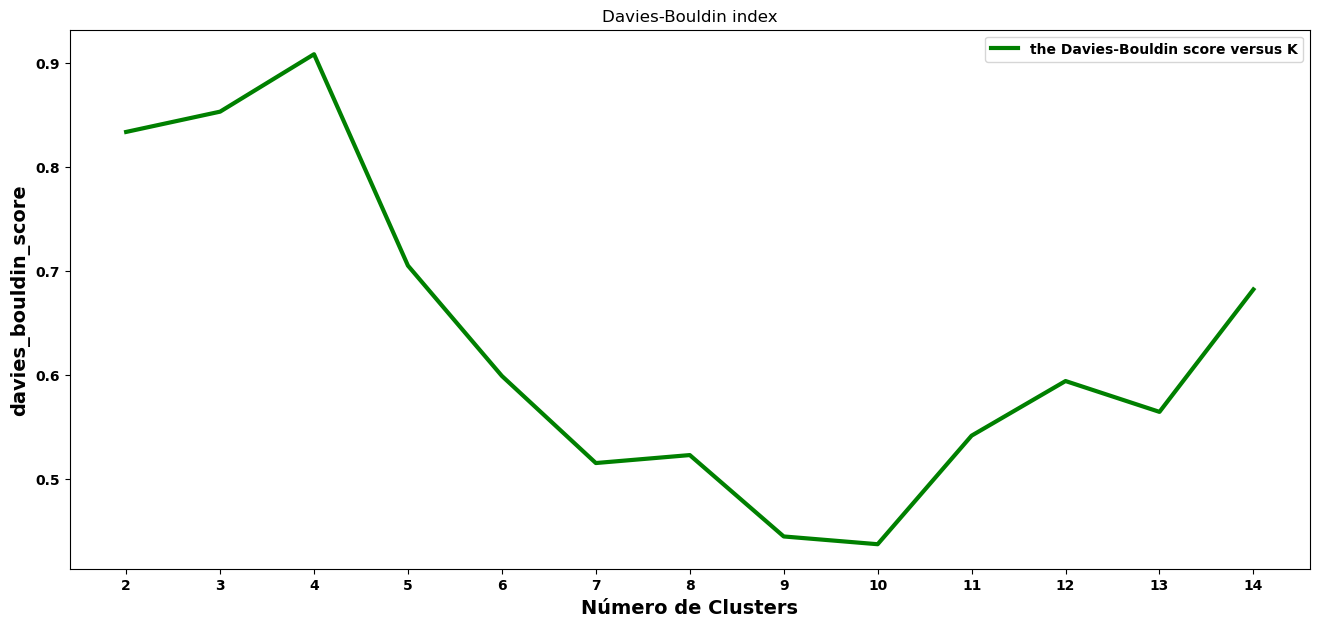

In [13]:
from sklearn.metrics import davies_bouldin_score

dav_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23)
    y_modelo_km = modelo_km.predict(pcv_23)
    dav_clust.append(davies_bouldin_score(pcv_23, y_modelo_km))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=dav_clust, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

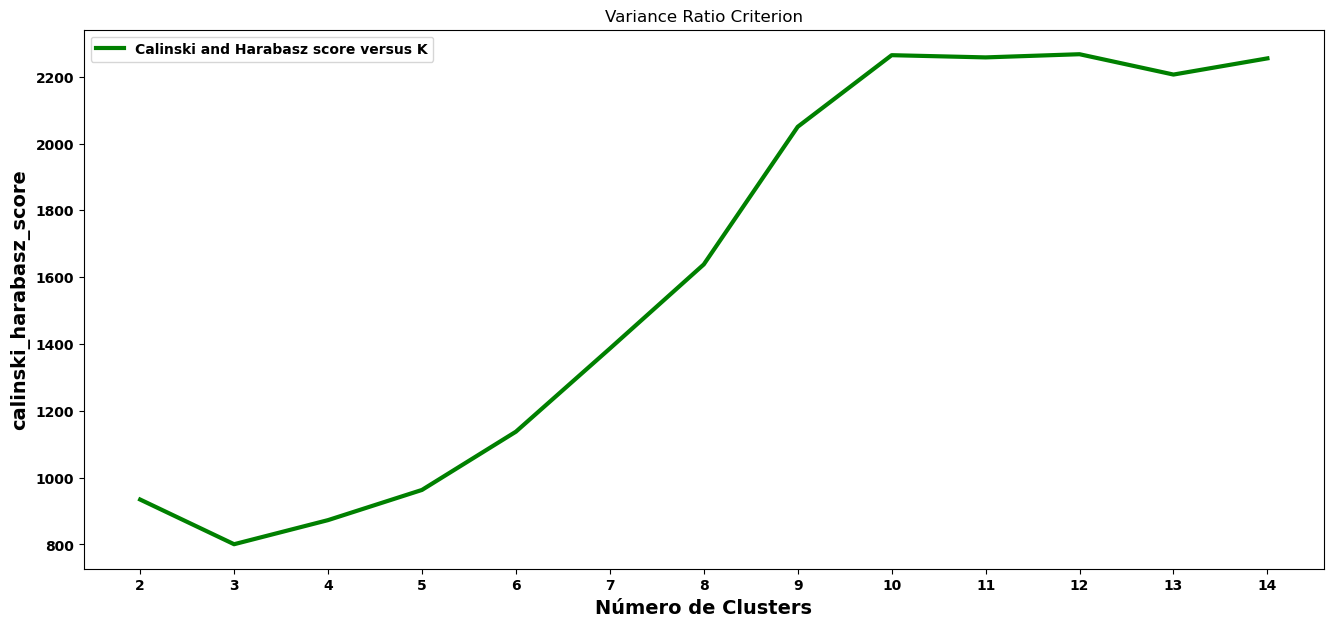

In [14]:
from sklearn.metrics import calinski_harabasz_score

calinsk_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23)
    y_modelo_km = modelo_km.predict(pcv_23)
    calinsk_clust.append(calinski_harabasz_score(pcv_23, y_modelo_km))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=calinsk_clust, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()

In [15]:
import math
def bic_score(X, labels):
  """
  BIC score for the goodness of fit of clusters.
  """

  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2

  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)

  return -bic

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

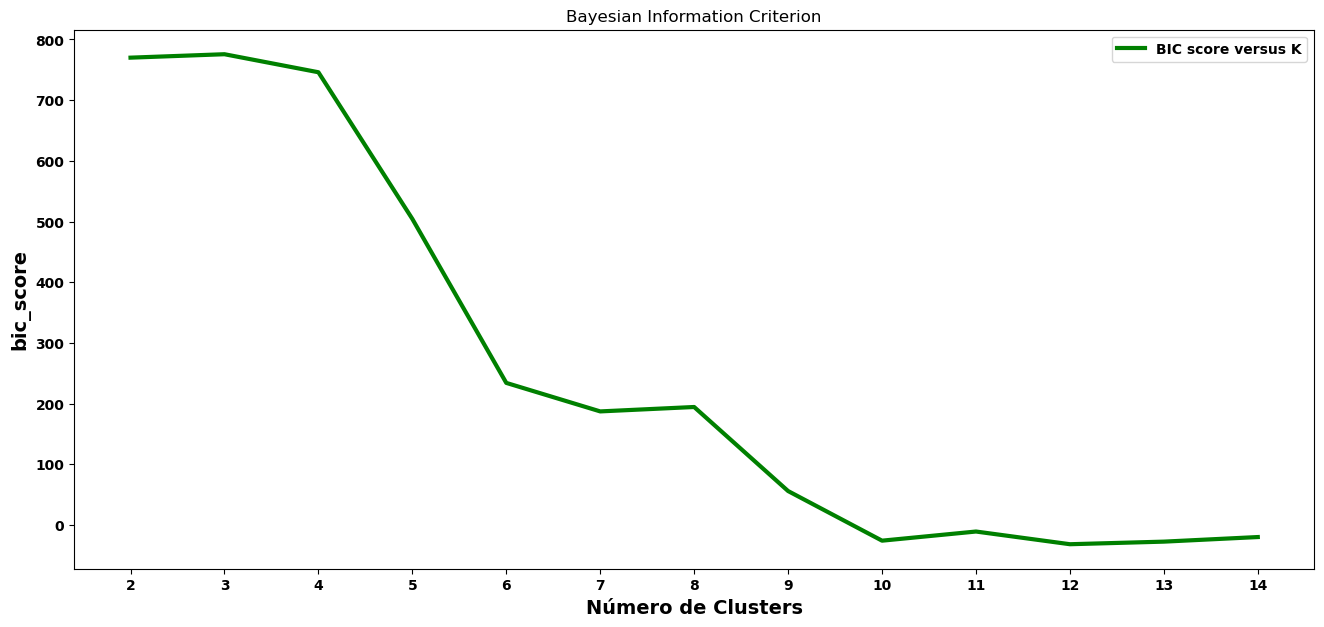

In [16]:
bic_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23)
    y_modelo_km = modelo_km.predict(pcv_23)
    bic_clust.append(bic_score(pcv_23, y_modelo_km))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_clust, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

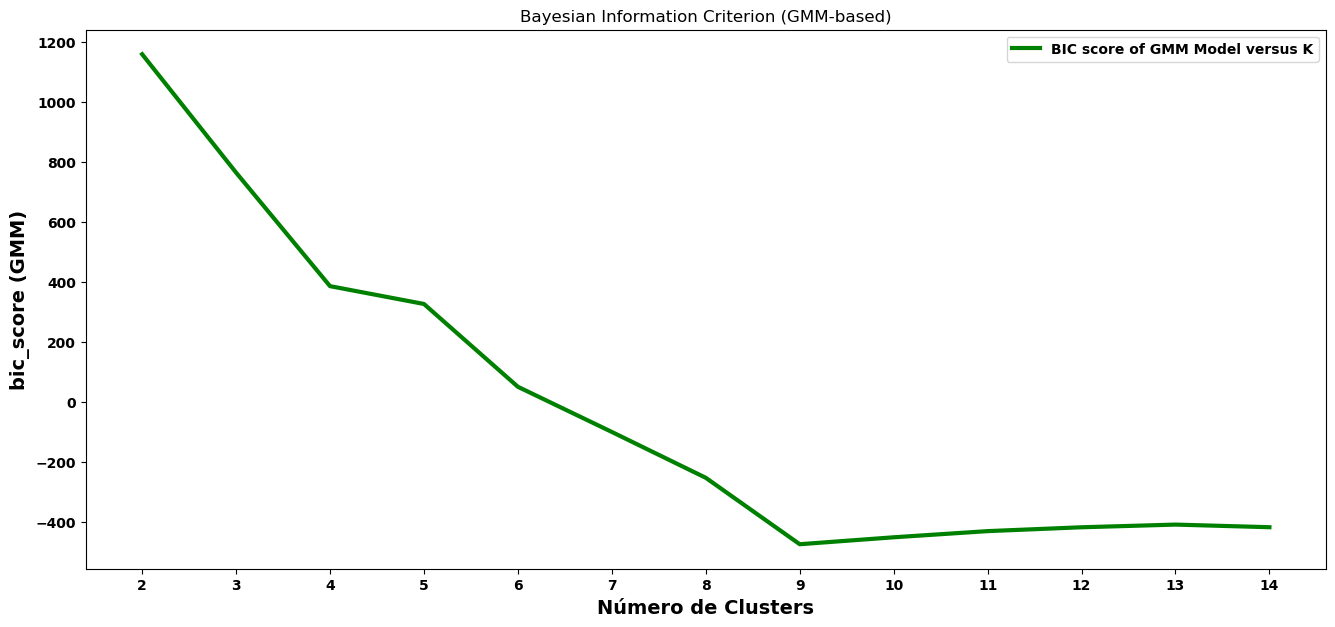

In [17]:
from sklearn.mixture import GaussianMixture

bic_gmm = []
for k in range(2, 15):
    modelo_gmm = GaussianMixture(n_components=k, random_state=100)
    modelo_gmm.fit(pcv_23)
    bic_gmm.append(modelo_gmm.bic(pcv_23))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_gmm, color='green', label='BIC score of GMM Model versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion (GMM-based)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score (GMM)", fontsize=14)
plt.show()

> #### Explicación 23.2.1
> Recordando que el valor óptimo de cluster que estimabamos era **12**, y analizando las gráficas de las métricas en base a los criterios que indica el enunciado, podemos llegar a la conclusión de que no muchos de los análisis coinciden con el valor que hemos predicho previamente.
>
> Gráficas de métricas como Silhouette Score o Davies-Bouldin estiman un valor batante alejado. Otras gráficas como **BIC (manual), Calinski, o BIC Score de GMM**, sí que estiman un valor igual o parecido a nuestra anterior predicción.

---

### **`Ejercicio 23.3`**

In [18]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


SSE =  6.288495911831451
Silhouette score =  0.6091408969231719


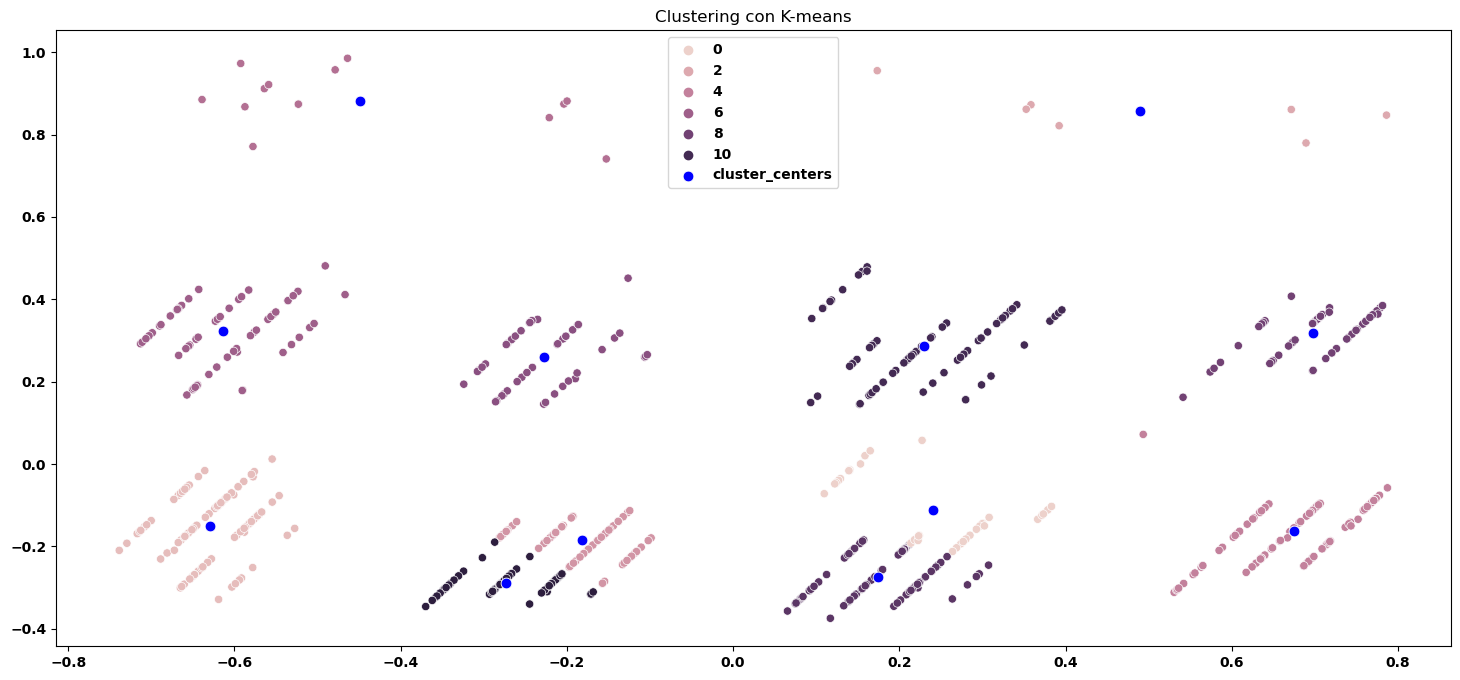

In [19]:
## Solución 23.3.1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

modelo_kmeans = KMeans(n_clusters=12, random_state=100)

modelo_kmeans.fit(pcv_23)

y_etiquetas = modelo_kmeans.labels_

centros_clust = modelo_kmeans.cluster_centers_

print("SSE = ", modelo_kmeans.inertia_)
print("Silhouette score = ", silhouette_score(pcv_23, y_etiquetas))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas)
sns.scatterplot(x=centros_clust[:,0], y=centros_clust[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

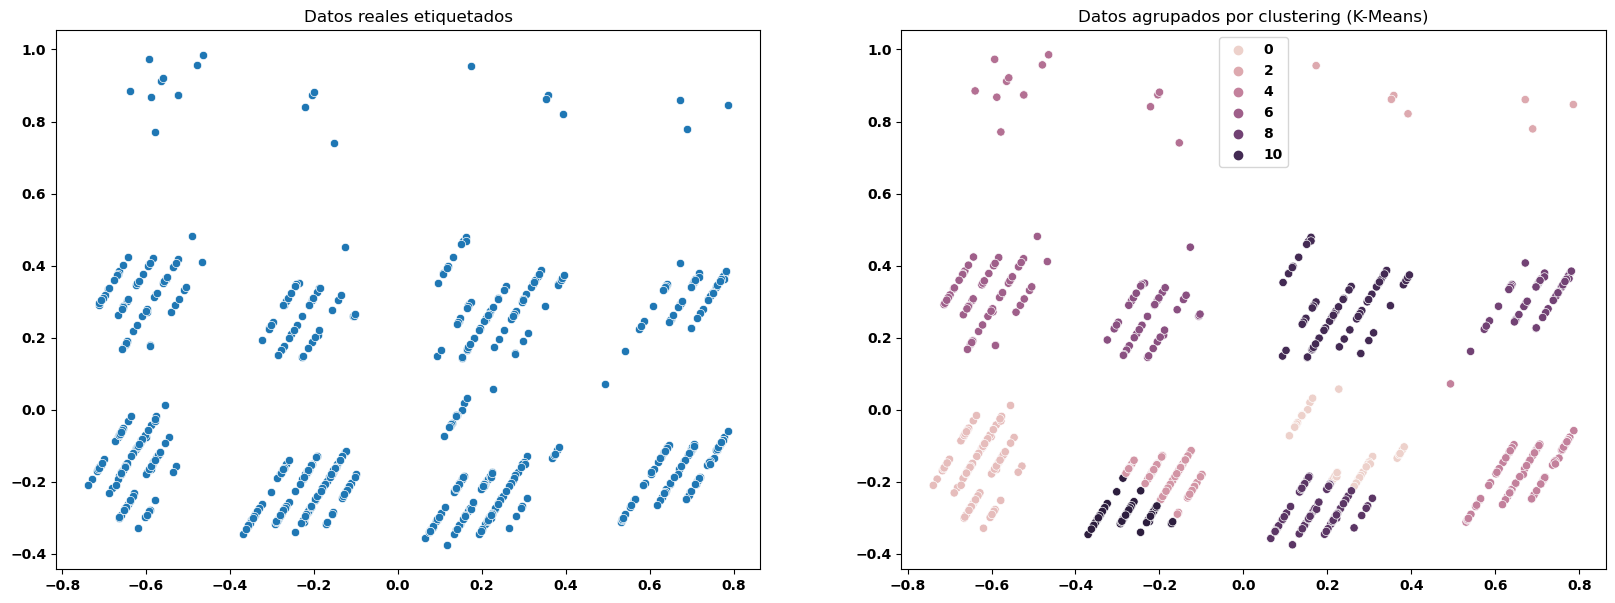

In [20]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], ax=axes[0])
axes[0].set_title("Datos reales etiquetados")

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Means)")

plt.show()

SSE =  64.83166475754113
Silhouette score =  0.5791332907145975


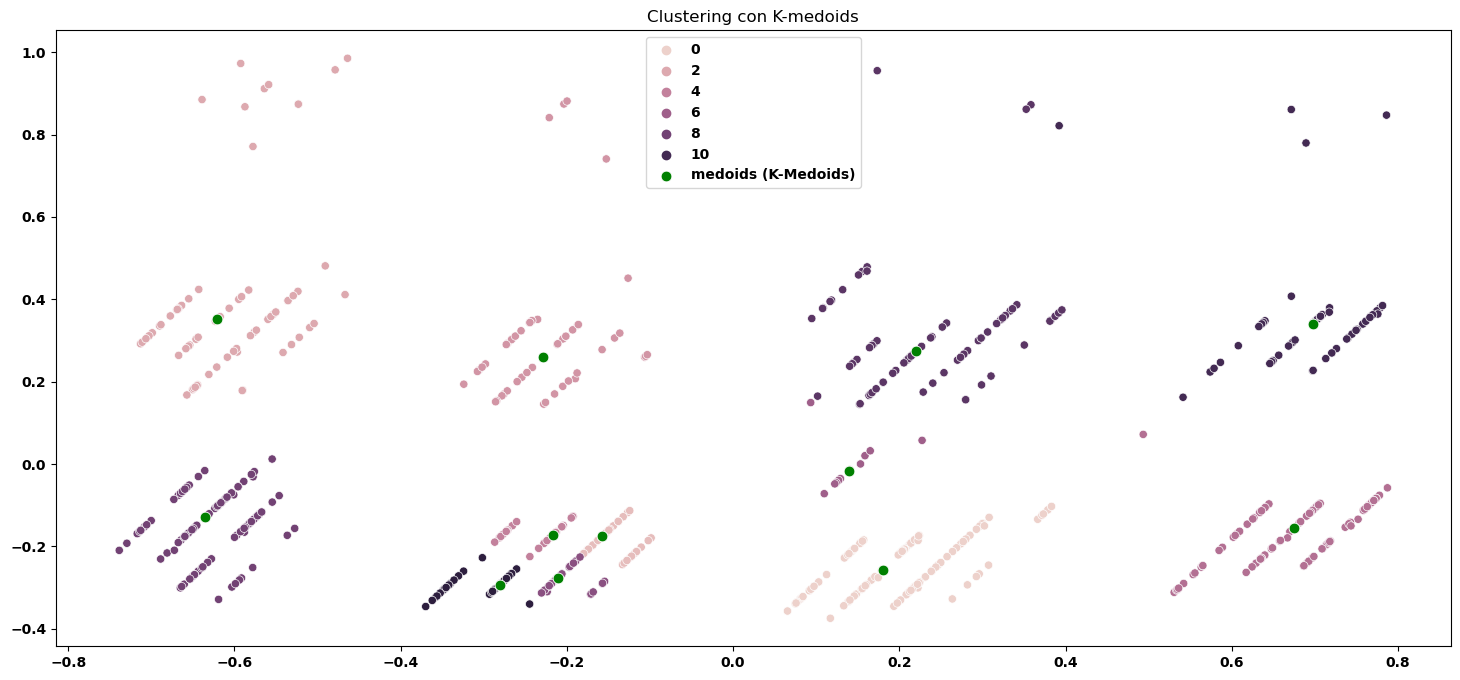

In [21]:
from sklearn_extra.cluster import KMedoids

modelo_kmedoids = KMedoids(n_clusters=12, random_state=100)

modelo_kmedoids.fit(pcv_23)

y_etiquetas_md = modelo_kmedoids.labels_

centros_clust_md = modelo_kmedoids.cluster_centers_

print("SSE = ", modelo_kmedoids.inertia_)
print("Silhouette score = ", silhouette_score(pcv_23, y_etiquetas_md))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_md)
sns.scatterplot(x=centros_clust_md[:,0], y=centros_clust_md[:,1], color='green', s=60, label='medoids (K-Medoids)')
plt.title("Clustering con K-medoids")
plt.show()

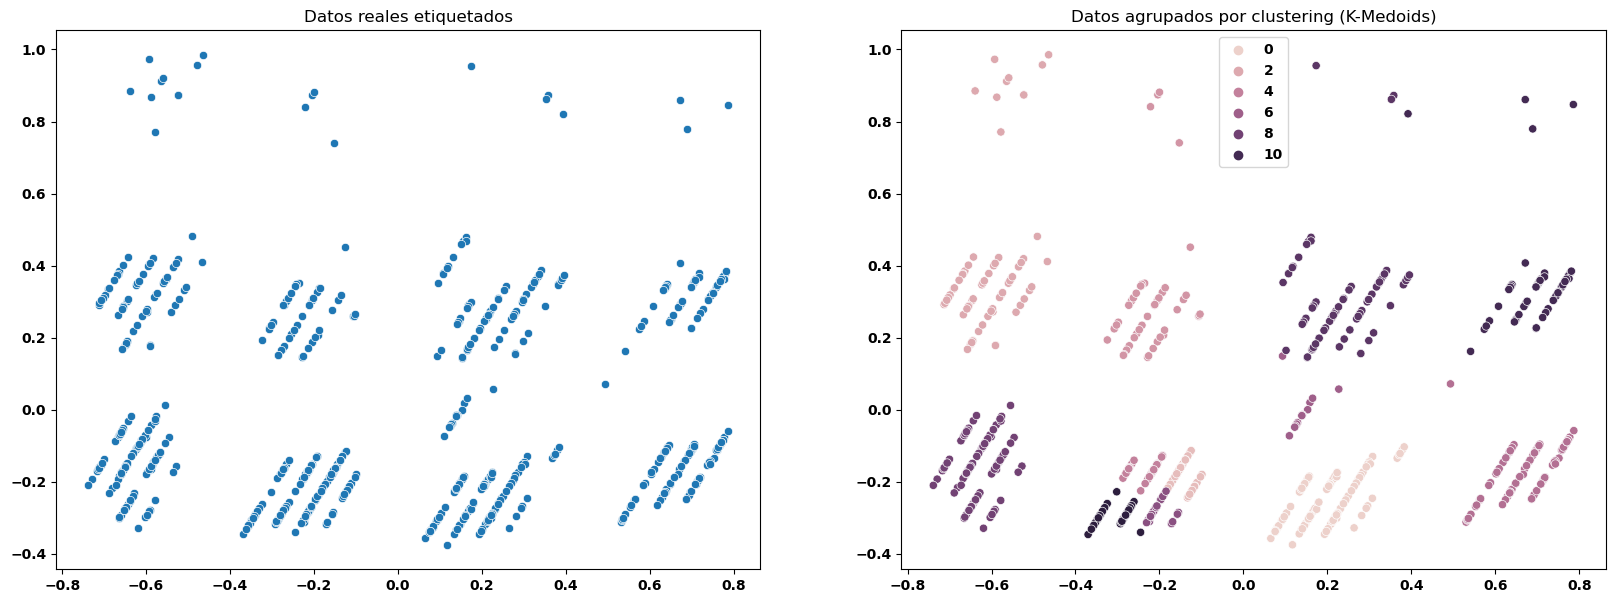

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], ax=axes[0])
axes[0].set_title("Datos reales etiquetados")

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_md, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Medoids)")

plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette score =  0.6238122120544926


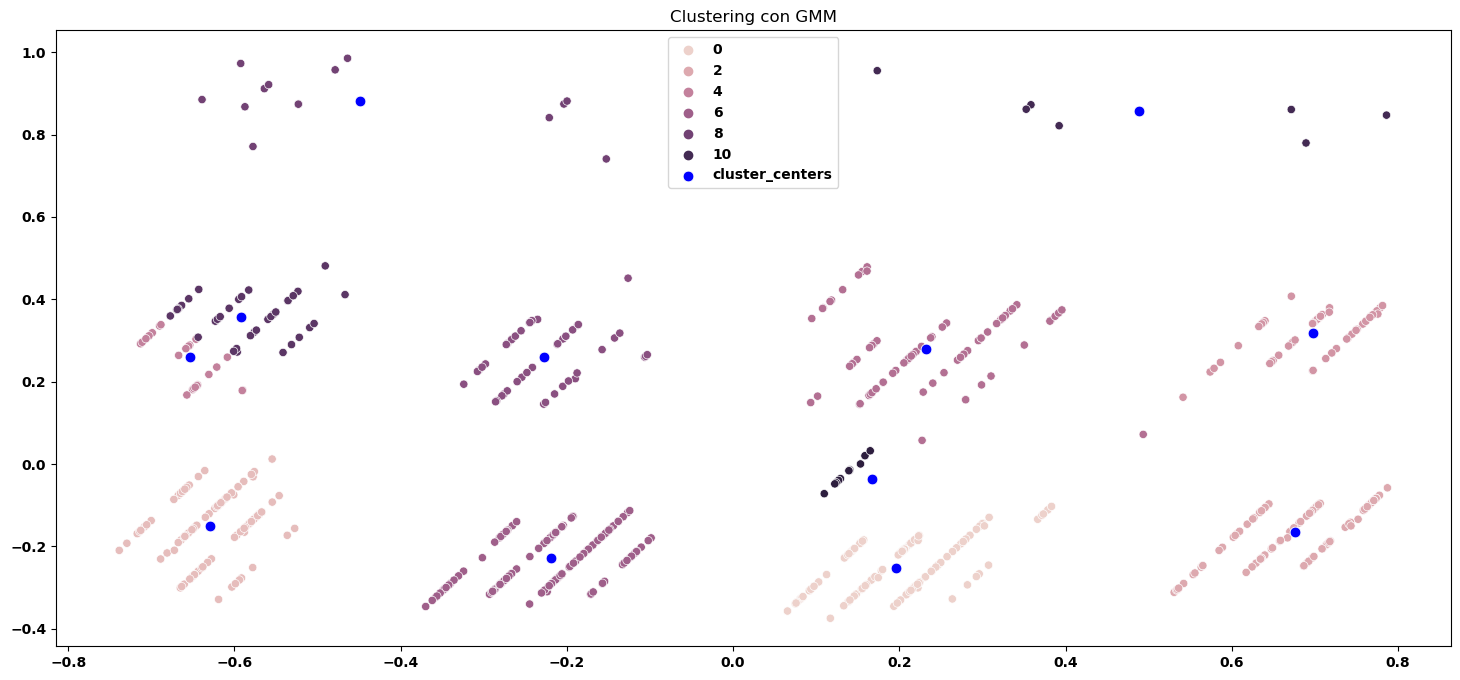

In [23]:
from sklearn.mixture import GaussianMixture

model_gmm = GaussianMixture(n_components=12, random_state=100)

model_gmm.fit(pcv_23)

y_etiquetas_gmm = model_gmm.predict(pcv_23)

centros2_gmm = model_gmm.means_

print("Silhouette score = ", silhouette_score(pcv_23, y_etiquetas_gmm))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_gmm)
sns.scatterplot(x=centros2_gmm[:,0], y=centros2_gmm[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con GMM")
plt.show()

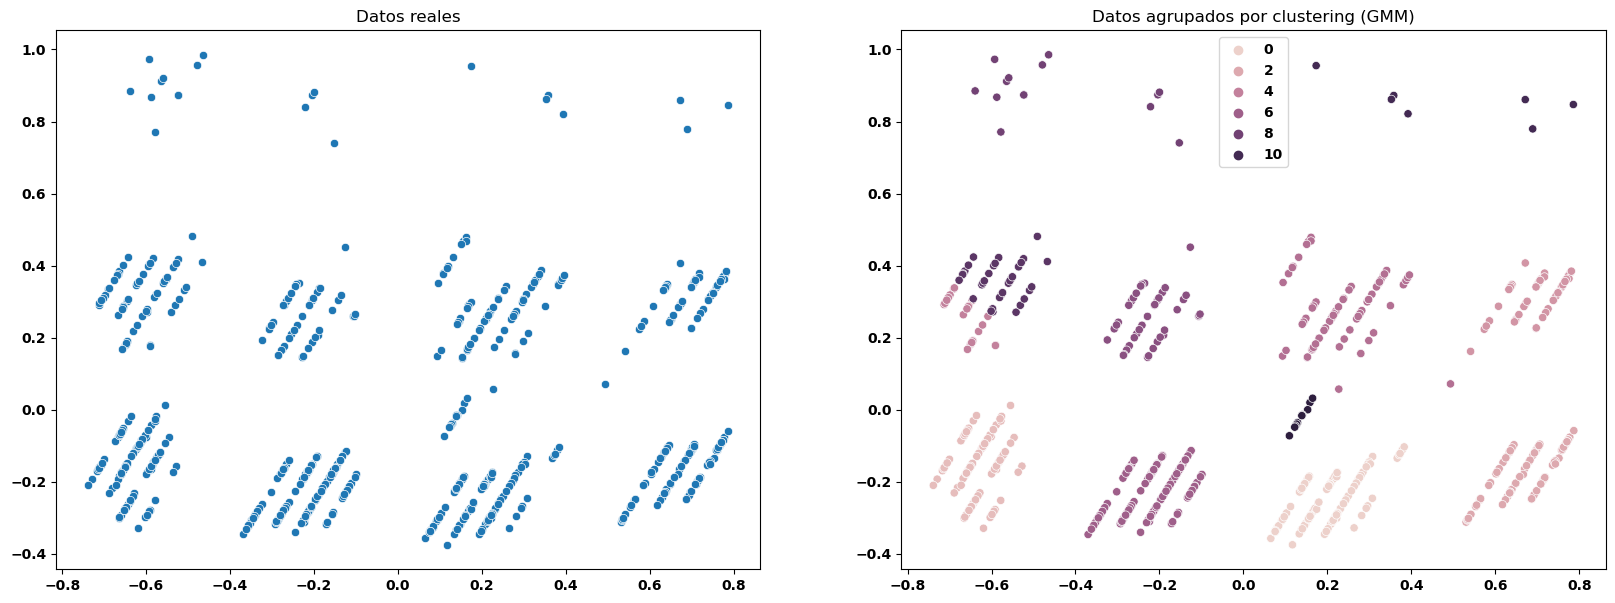

In [24]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], ax=axes[0])
axes[0].set_title("Datos reales")

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_gmm, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (GMM)")

plt.show()

Silhouette score =  0.651255970308663


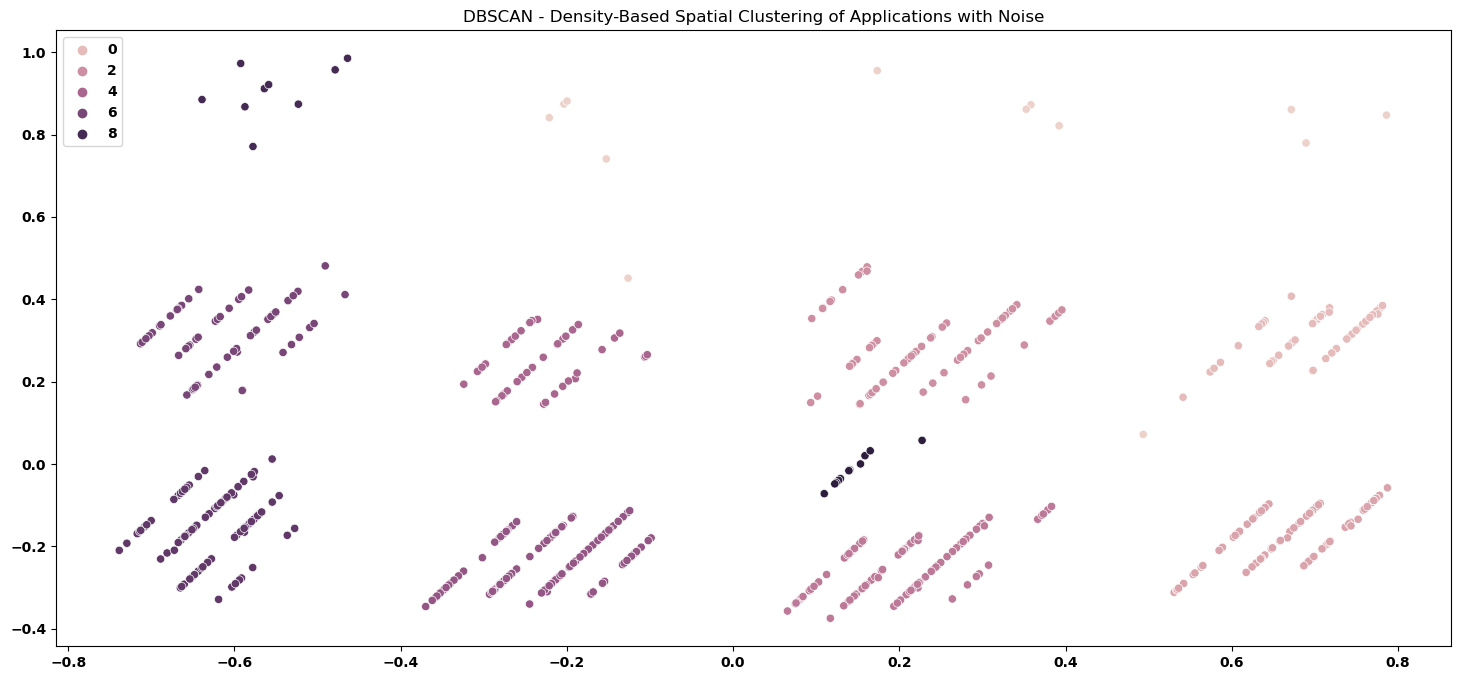

In [25]:
from sklearn.cluster import DBSCAN

modelo_dbscan = DBSCAN(eps=0.10)

modelo_dbscan.fit(pcv_23)

y_etiquetas_dbscan = modelo_dbscan.labels_

print("Silhouette score = ", silhouette_score(pcv_23, y_etiquetas_dbscan))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_dbscan)
plt.title("DBSCAN - Density-Based Spatial Clustering of Applications with Noise")
plt.show()

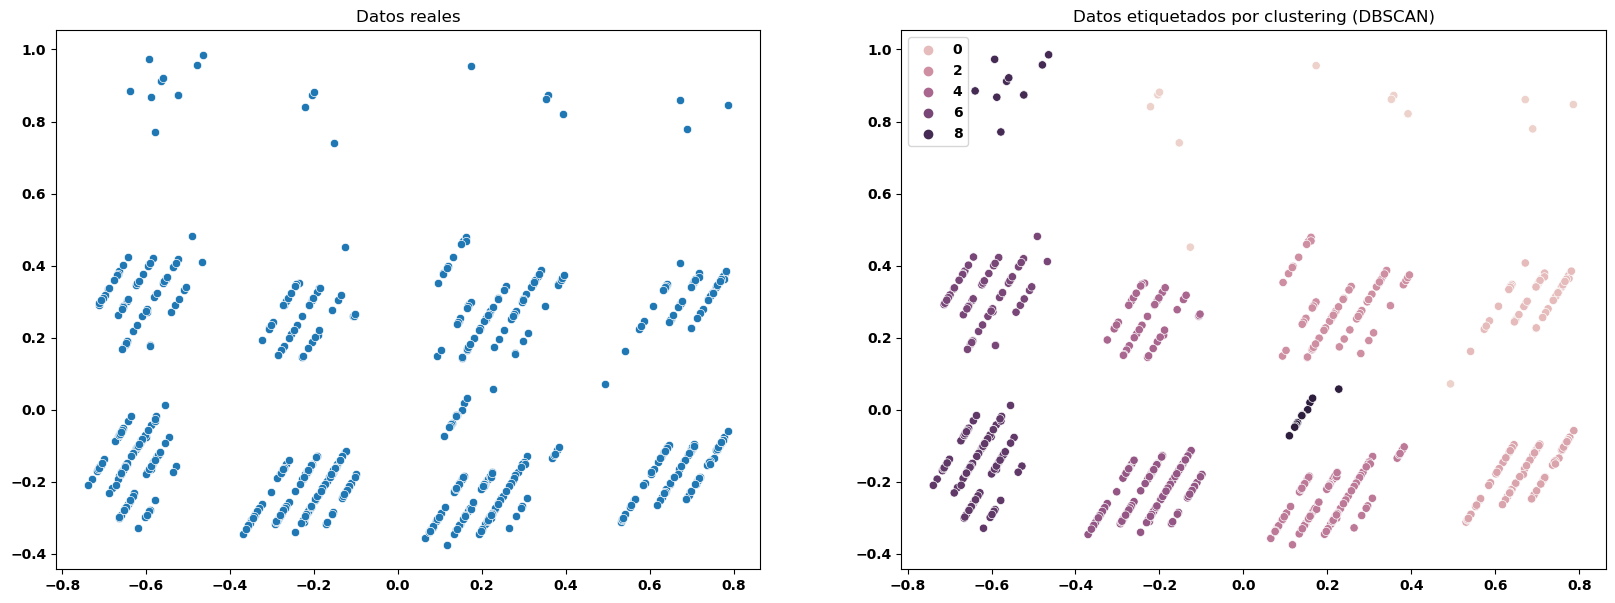

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], ax=axes[0])
axes[0].set_title("Datos reales")

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_dbscan, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (DBSCAN)")

plt.show()

Silhouette score =  0.5771891601677535


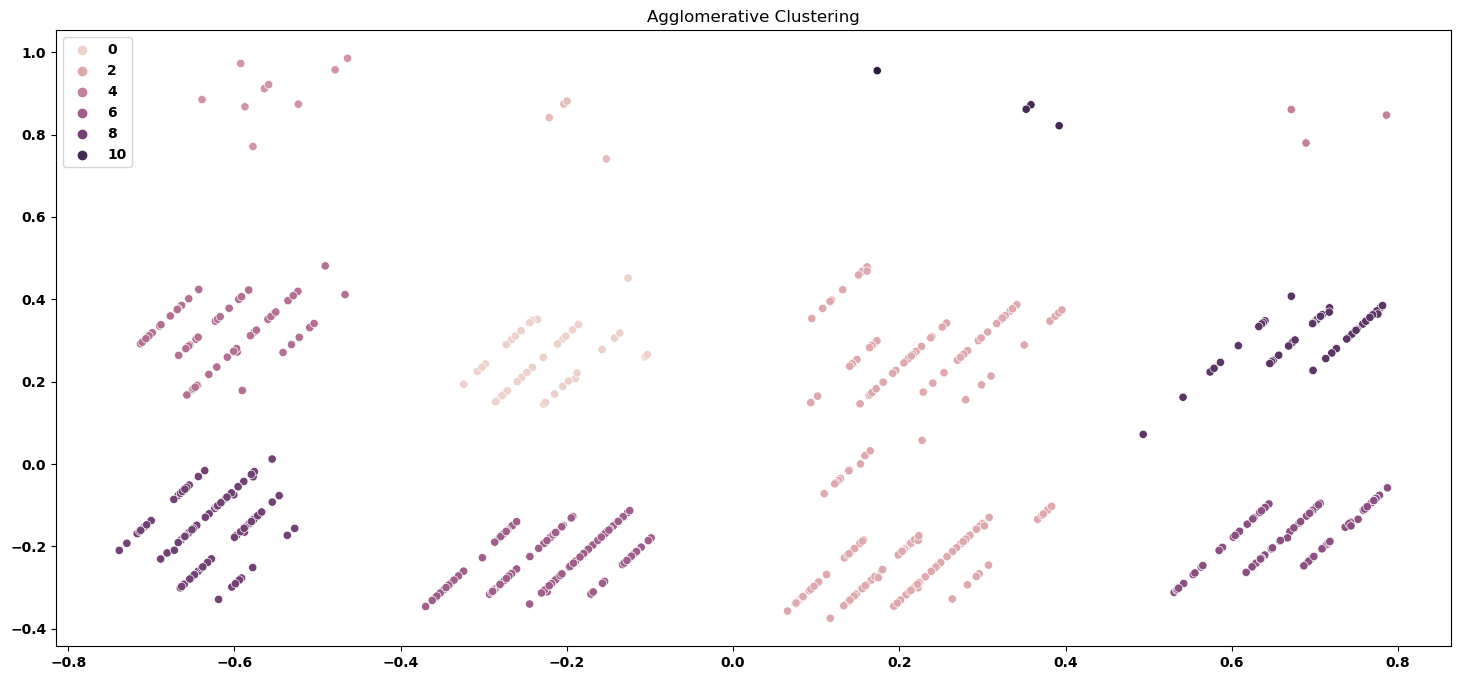

In [27]:
from sklearn.cluster import AgglomerativeClustering

modelo_agg = AgglomerativeClustering(n_clusters=12, linkage="single", metric='euclidean')

modelo_agg.fit(pcv_23)

y_etiquetas_agg = modelo_agg.labels_

print("Silhouette score = ", silhouette_score(pcv_23, y_etiquetas_agg))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_agg)
plt.title("Agglomerative Clustering")
plt.show()

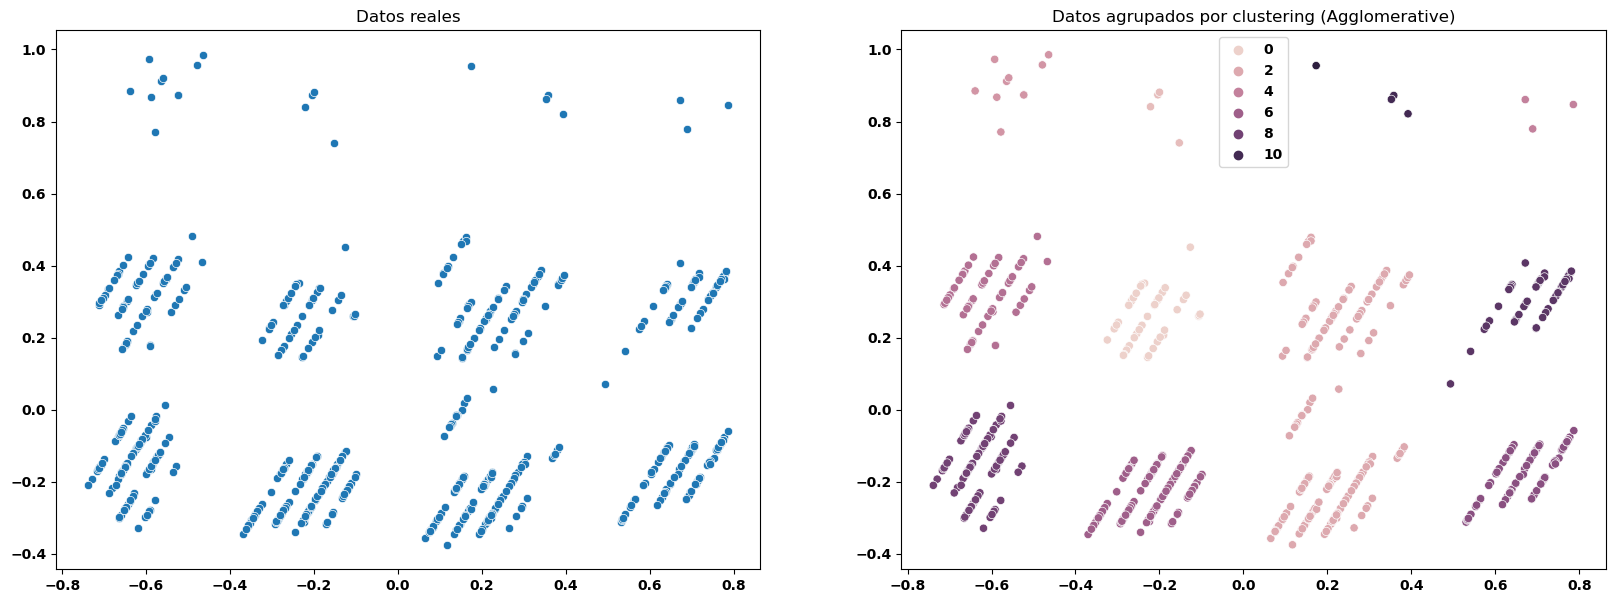

In [28]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], ax=axes[0])
axes[0].set_title("Datos reales")

sns.scatterplot(x=pcv_23[:,0], y=pcv_23[:,1], hue=y_etiquetas_agg, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (Agglomerative)")

plt.show()

> #### Explicación 23.3.1
> Hay muchos modelos que estan bastante lejos de la agrupación sugerida por la visualización de los datos transformados al espacio bidimensional. 
>
>Sin embargo, podemos destacar un modelo del resto, el cual sí parece que está haciendo una agrupación que se acerca a la predicción correcta, este modelo es **Agglomerative**.

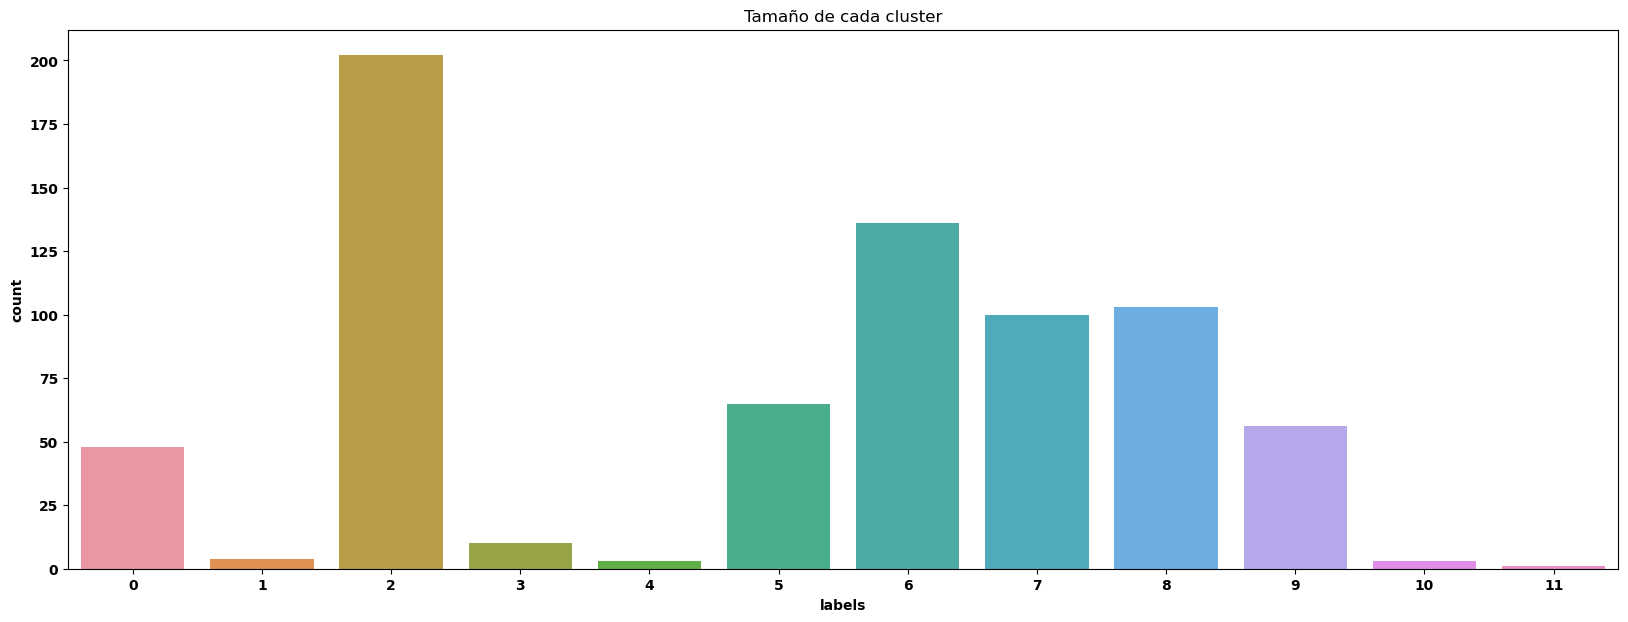

In [29]:
## Solución 23.3.2
df_bike3['labels'] = y_etiquetas_agg

plt.figure(figsize=(20, 7))
sns.countplot(data=df_bike3, x='labels')
plt.title('Tamaño de cada cluster')
plt.show()

> #### Explicación 22.3.3
> Podemos observar que la etiqueta con mayor valor de volumetría es la 2, seguida por la 6 y la 8, con la 7 muy cerca. Por otro lado, etiquetas como la 1, la 4, la 10 o la 11 aparecen mucho menos en comparación.

---

### **`Ejercicio 23.4`**

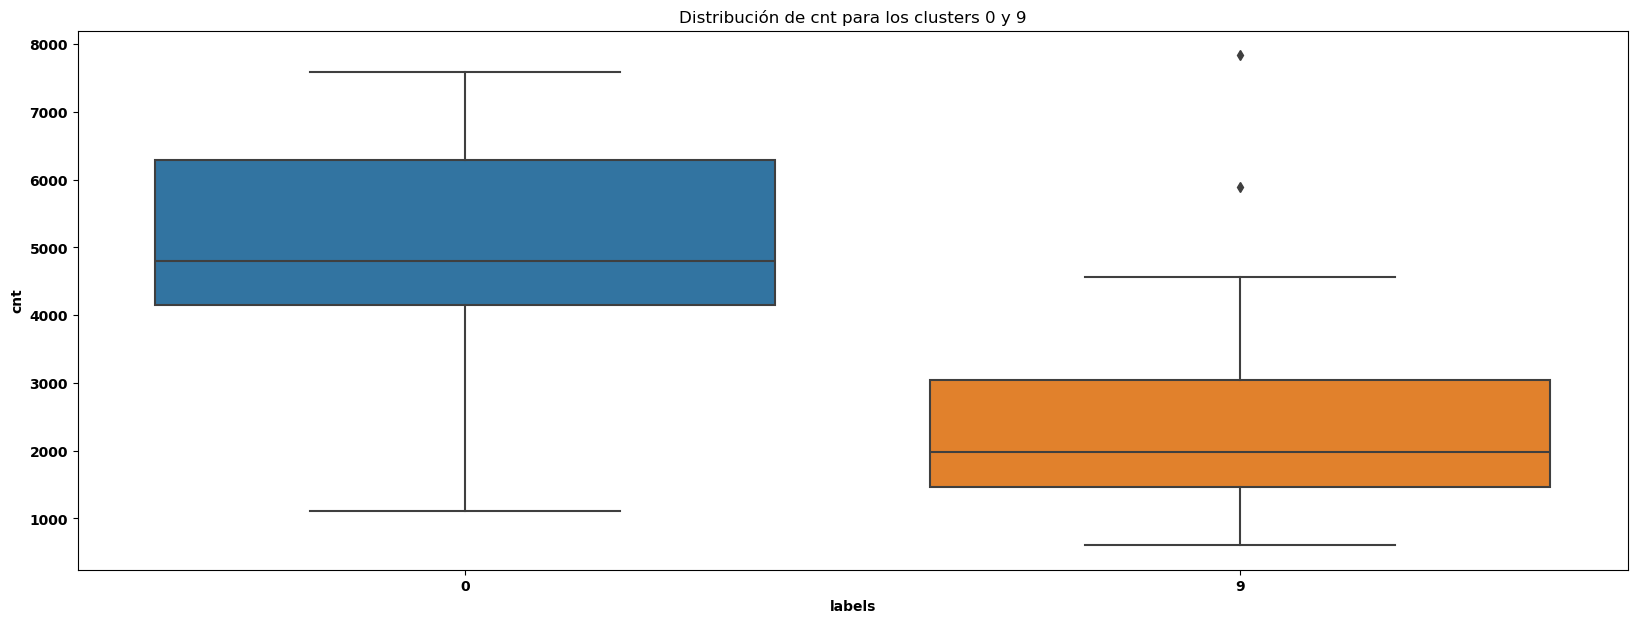

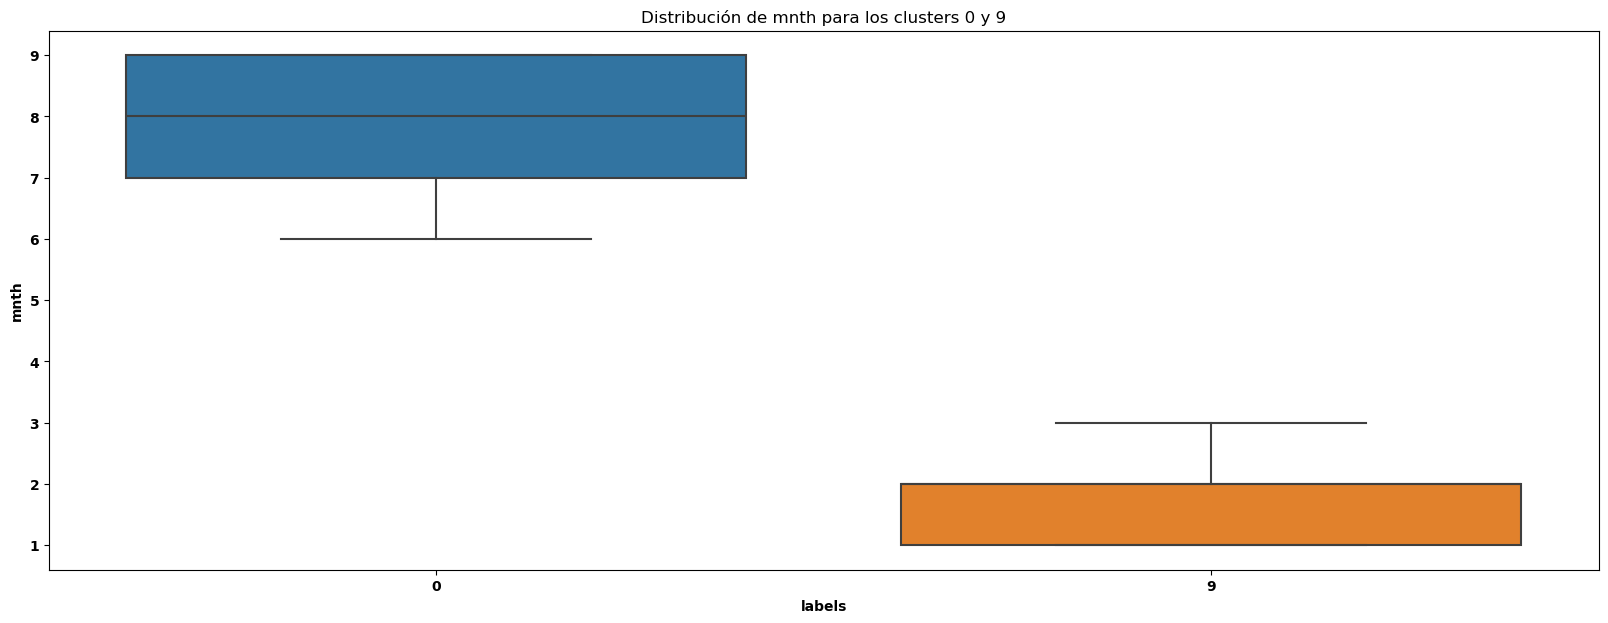

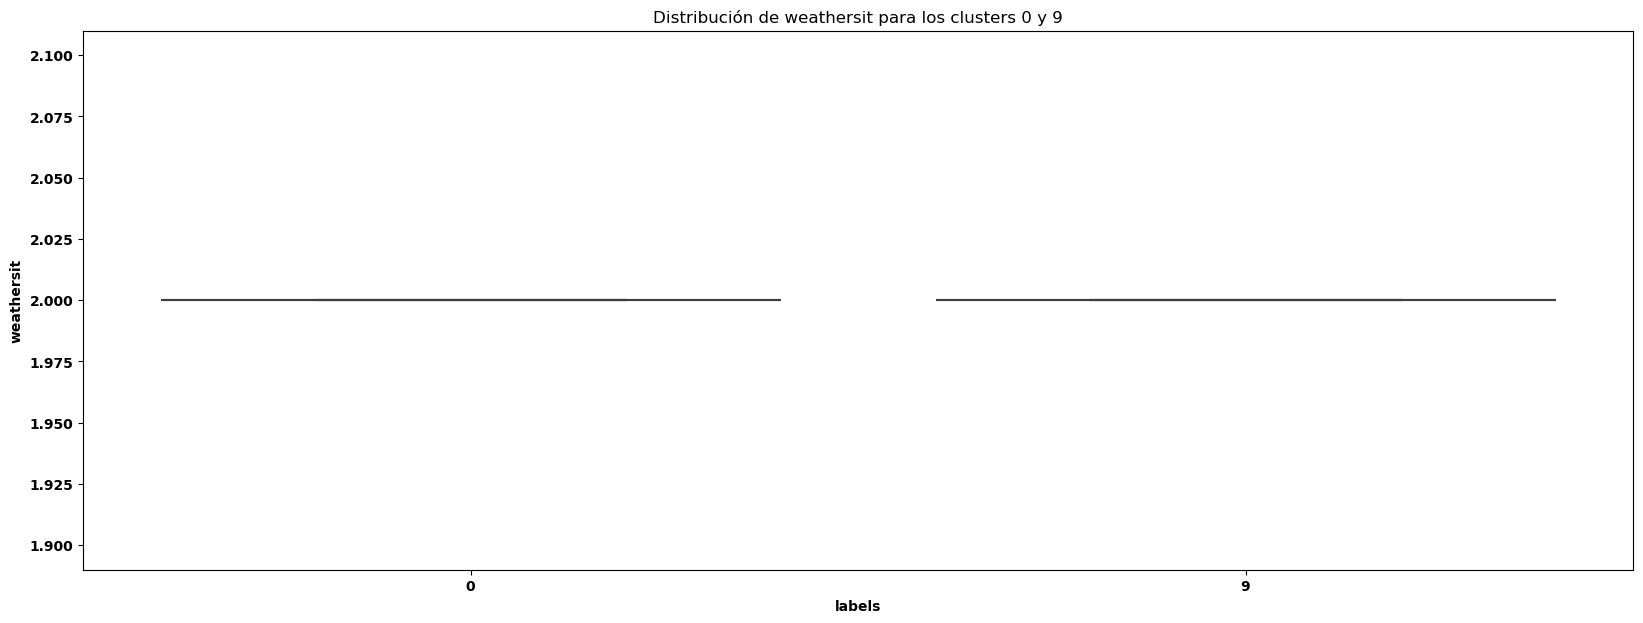

In [30]:
## Solución 23.4.1
df_clusters = df_bike3[df_bike3['labels'].isin([0, 9])]

variables = ['cnt', 'mnth', 'weathersit']
for var in variables:
    plt.figure(figsize=(20, 7))
    sns.boxplot(data=df_clusters, x='labels', y=var)
    plt.title(f'Distribución de {var} para los clusters 0 y 9')
    plt.show()


> #### Explicación 23.4.1
> Analizando los boxplot podemos sacar diferentes conclusiones. Para la distribución de **viajes o bicicletas alquiladas**, podemos observar que el **cluster 0 presenta un mayor numero de viajes** en comparación al décimo grupo.
>
> Por otro lado, podemos observar también que **con relación al mes del año**, el **primer cluster** contiene los registros de viajes que tienden a ocurrir a **finales del año**, mientras que el **décimo grupo** presenta registros con valores de **meses más tempranos**.
>
> Para las condiciones relacionadas con el tiempo, podemos ver una distribución bastante pareja entre ambos clusters.

> #### Explicación 23.4.2
> De estos resultados y de sus respectivos análisis, podemos sugerir diferente tipo de ideas, usos y elementos a tener en cuenta.
>
> Por ejemplo, conociendo que el cluster_0 presenta un mayor número de registros y se centra en finales de año, podemos idear campañas y estrategias que permiten sacar una mayor rentabilidad al servicio de bike-sharing.
>
> Entender estos patrones permite también conocer cuales son las situaciones actuales del servicio para implementar mejoras, o detectar posibles fallos en según que puntos del sistema.